#  *THIS IS A PORTFOLIO PROJECT FOR LIFE EXPECTANCY & GDP*
======================================================================================
## *INTRODUCTION*
=====================
### In this project I will analize the life expectancy and gdp of six different countries:
* Chile
* China
* Germany
* Mexico
* Unites States
* Zimbabwe

### The "*raw*" data consists of a csv file with the following variables:

* `Country`
* `Year`
* `Life Expectancy at birth in years`
* `GPD`
### Research Questions:
##### **Has the life expectancy improved over the years?**
##### **Is there a correlation between GDP and life expectancy?**
##### **What is the behavior of the GDP over the years?**

## *Method & Analysis*
=====================

In [129]:
#import libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
#read csv file into a dataframe
gdp_data = pd.read_excel('all_data_2.xlsx')
#print the first 5 rows
print('The first 5 rows of the data look like this:')
print(gdp_data.head())
#print the info of the df and main stats of the variables
print(gdp_data.info())
print(gdp_data.describe(include='all'))

The first 5 rows of the data look like this:
  Country  Year  Life expectancy at birth (years)          GDP   GDP_Inc  \
0   Chile  2000                              77.3  77900000000  0.000000   
1   Chile  2001                              77.3  71000000000 -0.088575   
2   Chile  2002                              77.8  69700000000 -0.105263   
3   Chile  2003                              77.9  75600000000 -0.029525   
4   Chile  2004                              78.0  99200000000  0.273427   

   LifeExp_Inc  
0     0.000000  
1     0.000000  
2     0.006468  
3     0.007762  
4     0.009056  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 

* The data contains 96 entries with no null values
* The data types are correct as Country is a string while the life expectancy and GPD are float. Year is an integer
* The data shows no issues with missing data or wrong entries 

In [130]:
#Change the Life expectancy variable name
gdp_data.rename(columns={'Life expectancy at birth (years)': 'Life'}, inplace=True)
print(gdp_data.head())
#Change the LifeExp variable name
gdp_data.rename(columns={'LifeExp_Inc': 'Life_Inc'}, inplace=True)
print(gdp_data.head())

  Country  Year  Life          GDP   GDP_Inc  LifeExp_Inc
0   Chile  2000  77.3  77900000000  0.000000     0.000000
1   Chile  2001  77.3  71000000000 -0.088575     0.000000
2   Chile  2002  77.8  69700000000 -0.105263     0.006468
3   Chile  2003  77.9  75600000000 -0.029525     0.007762
4   Chile  2004  78.0  99200000000  0.273427     0.009056
  Country  Year  Life          GDP   GDP_Inc  Life_Inc
0   Chile  2000  77.3  77900000000  0.000000  0.000000
1   Chile  2001  77.3  71000000000 -0.088575  0.000000
2   Chile  2002  77.8  69700000000 -0.105263  0.006468
3   Chile  2003  77.9  75600000000 -0.029525  0.007762
4   Chile  2004  78.0  99200000000  0.273427  0.009056


#### **Has the life expectancy improved over the years?**

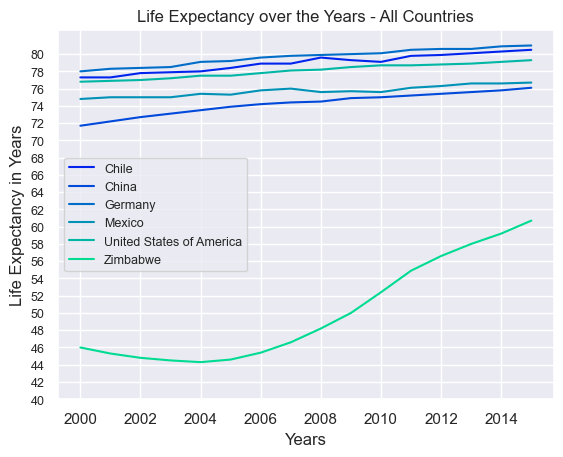

<Figure size 640x480 with 0 Axes>

In [145]:
#set the theme for all the graphs 
sn.set_theme(style="darkgrid")
#ploting life expectancy vs years for each contry
sn.lineplot(data=gdp_data, x='Year', y='Life', hue='Country', palette='winter')
plt.xlabel('Years')
plt.ylabel('Life Expectancy in Years')
plt.title('Life Expectancy over the Years - All Countries')
#Adjust y-axis to show each year 
plt.yticks(np.arange(40, 82, 2))
plt.yticks(fontsize=9)
plt.legend(fontsize=9,loc='center left')
plt.show()
plt.clf()

- The life expectancy over the years shows a increase for all the countries exepct for Zimbabwe.
- The differences between ages prevents to see the slope of the other countries. 
- Zimbabwe shows a high incrase of life expectancy in the 15 years studied. 

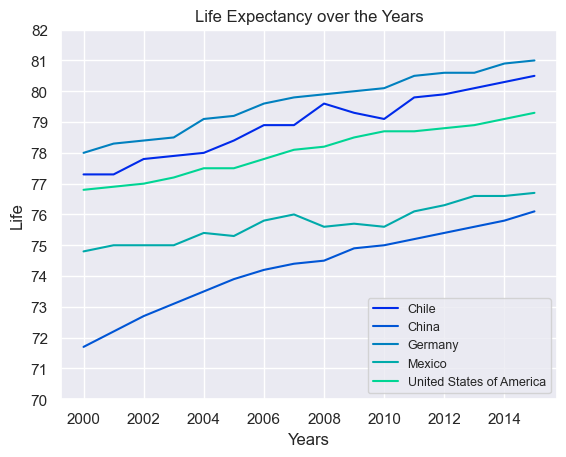

<Figure size 640x480 with 0 Axes>

In [146]:
#ploting all countries except Zimbabwe
#Create data free. Without Zimbabwe. 
gdp_data_wozim = gdp_data[gdp_data['Country'] != 'Zimbabwe']
sn.lineplot(data=gdp_data_wozim, x='Year', y='Life', hue='Country', palette='winter')
plt.title('Life Expectancy over the Years')
plt.xlabel('Years')
plt.ylabel('Life')
#Adjust y-axis.
plt.yticks(np.arange(70, 83, 1))
plt.legend(fontsize=9,loc='lower right')
sn.set_theme(style="darkgrid")
plt.show()
plt.clf()

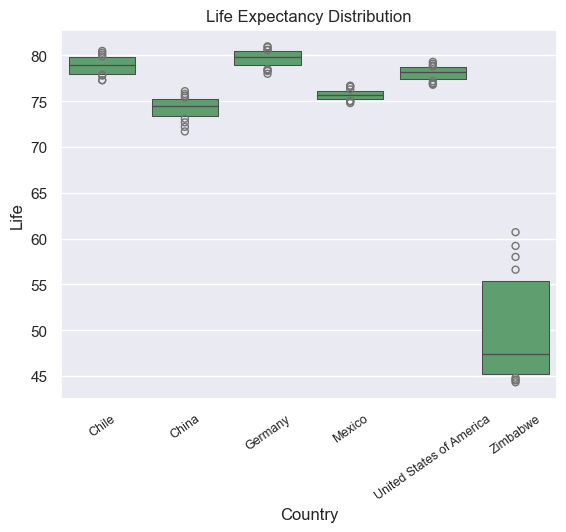

The average life expectancy for Chile is 78.94
The average life expectancy for China is 74.26
The average life expectancy for Germany is 79.66
The average life expectancy for Mexico is 75.72
The average life expectancy for United States of America is 78.06
The average life expectancy for Zimbabwe is 50.09


<Figure size 640x480 with 0 Axes>

In [133]:
#boxplot to show the age distribution
sn.boxenplot(data=gdp_data, x='Country', y='Life', color='g')
plt.xticks(rotation=35, fontsize=9)
plt.title('Life Expectancy Distribution')
plt.show()
plt.clf()
for items in gdp_data.Country.unique():
    life_df=gdp_data[gdp_data.Country==items]
    mean_life = round(np.mean(life_df.Life),2)
    print(f'The average life expectancy for {items} is {mean_life}')

- The data shows that all countries have experienced increase in life expectancy but not in the same levels.
- In the course of 15 years the life expectancy in Zimbabwe increased by almost 15 years. The life Expectancy values are highly spread, the IQR spans for 10 years.
- The second increase is observed in China with 4 years increase in life expectancy in the same time lapse. 
- The rest of the countries increased between 2-3 years
- The life expectancy ranges are more narrow. Showing less drastic changes during the 15 years of the study. 

#### **Is there a correlation between GDP and life expectancy?**

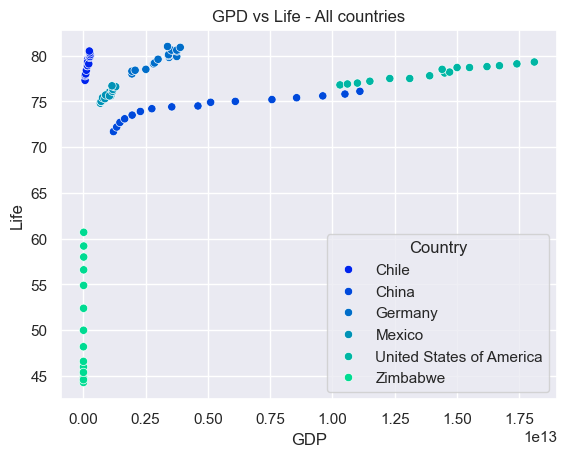

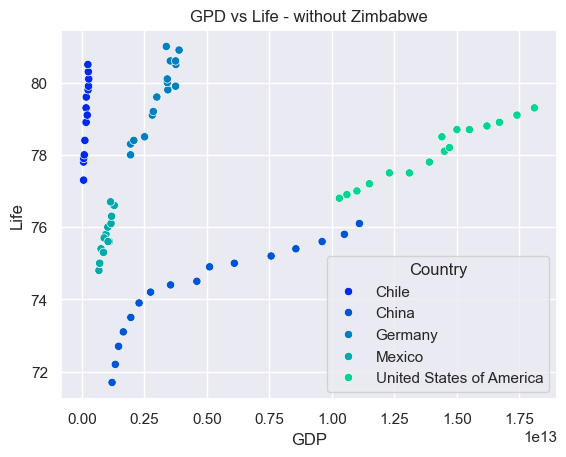

<Figure size 640x480 with 0 Axes>

In [148]:
#plot gdp and life expectancy
sn.scatterplot(data=gdp_data, x='GDP', y='Life', hue='Country', palette='winter')
plt.title('GPD vs Life - All countries')
plt.show()
plt.clf()
sn.scatterplot(data=gdp_data_wozim, x='GDP', y='Life', hue='Country', palette='winter')
plt.title('GPD vs Life - without Zimbabwe')
plt.show()
plt.clf()

- The data shows great dispersion in GDP since these countries have big differences in economic development and therefore GDP. However, the data shows correlation between GDP and life expectancy. There is a linear correlation in the all the countries but not in the same scale due to the GDP amounts. 
- It is difficult to asses all the countries with only one plot since the scales of the different GDPs vary. It is necessary to evaluate each country individually or by groups. 

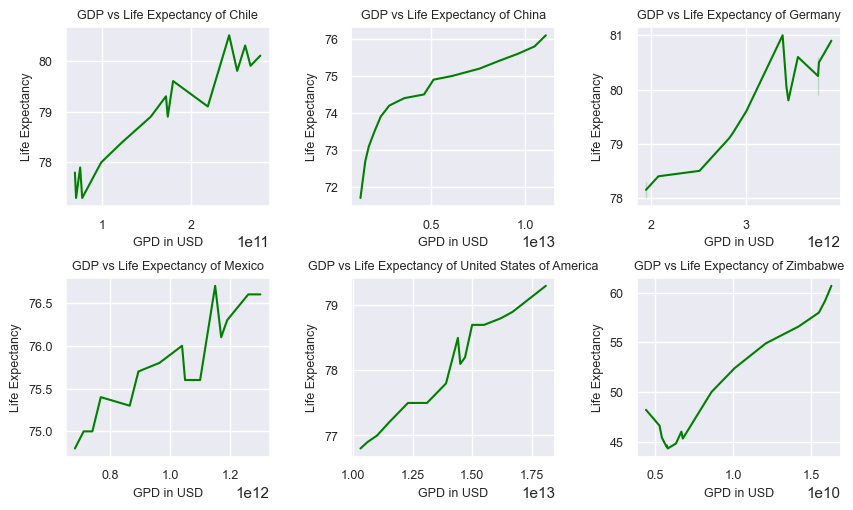

<Figure size 640x480 with 0 Axes>

In [135]:
#plot linear plot of life expectancy and GPD for each country 
plt.figure(figsize=(10,10))
#Counter to change the subplot. 
counter = 1
for items in gdp_data.Country.unique():
    country_data=gdp_data[gdp_data.Country == items]
    plt.subplot(3,3,counter)
    sn.lineplot(data=country_data, x='GDP',y='Life', color='green')
    plt.title(f'GDP vs Life Expectancy of {items}', fontsize=9)
    plt.xlabel('GPD in USD', fontsize=9)
    plt.ylabel('Life Expectancy', fontsize =9)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    counter = counter + 1
#Adjust spaces between plots. 
plt.subplots_adjust(wspace = 0.4, hspace= 0.4, bottom = 0.2)
plt.show()
plt.clf()

##### **What is the behavior of the GDP over the years?**

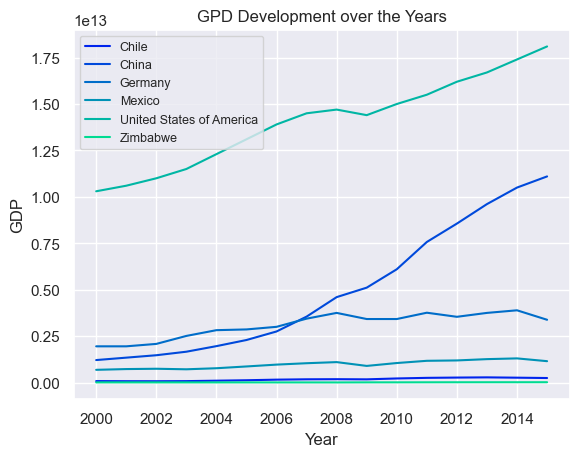

<Figure size 640x480 with 0 Axes>

In [149]:
#plot GDP over the years
sn.lineplot(data=gdp_data, x='Year', y='GDP', hue='Country', palette='winter')
plt.title('GPD Development over the Years')
plt.legend(fontsize=9,loc='upper left')
plt.show()
plt.clf()

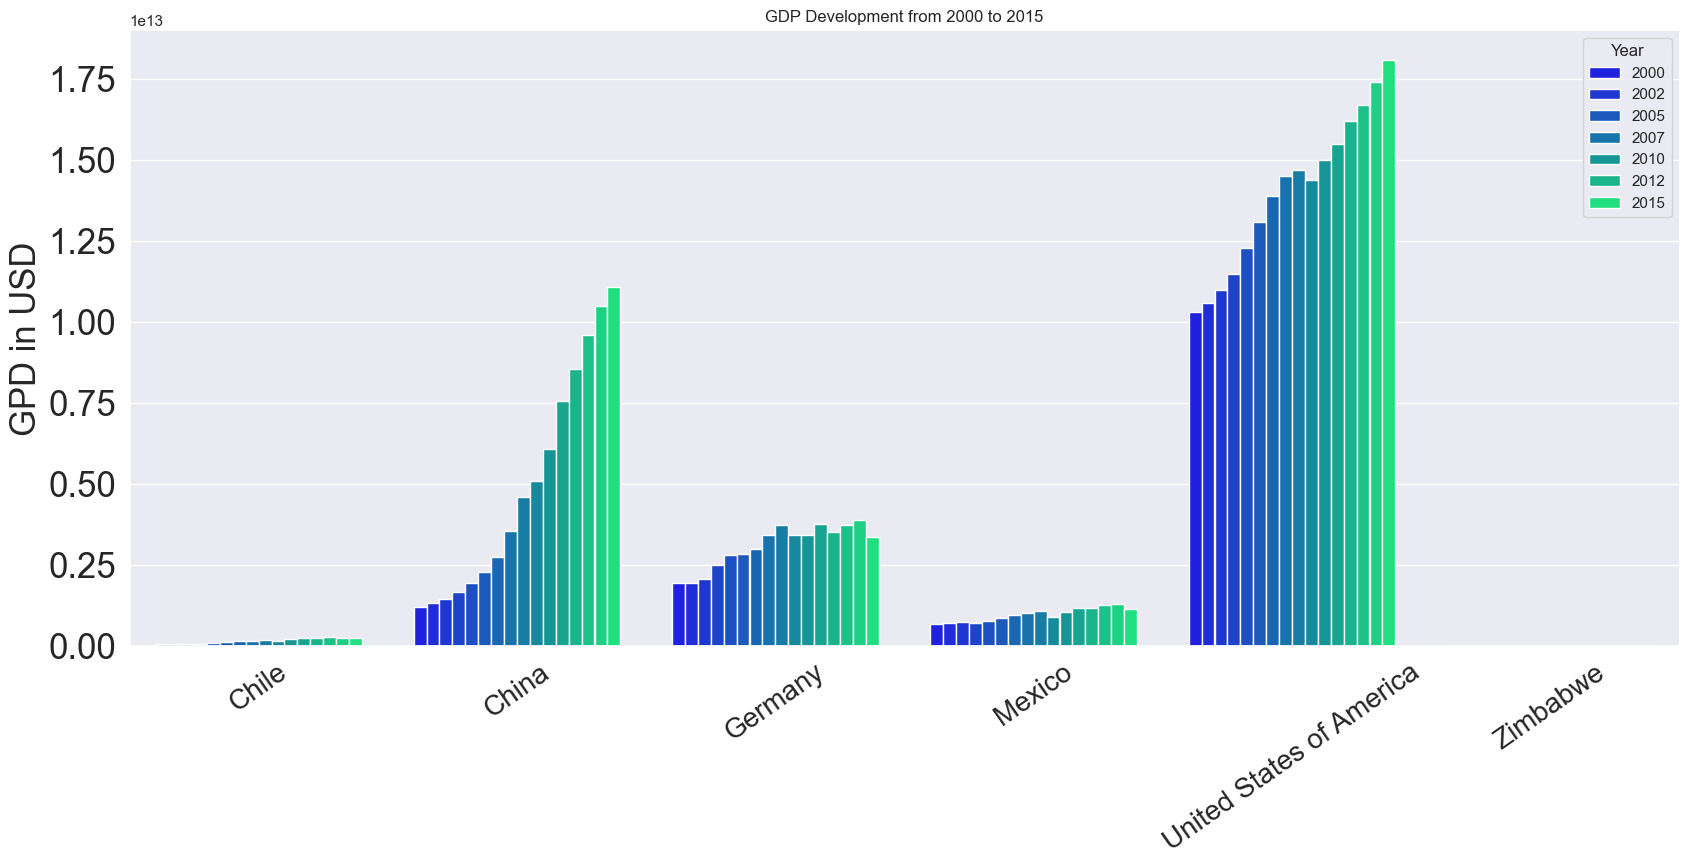

<Figure size 640x480 with 0 Axes>

In [137]:
#histogram of gdp over the years
plt.figure(figsize=(20,8))
sn.barplot(data=gdp_data, x='Country', y='GDP', hue='Year', palette='winter')
plt.xlabel(None)
plt.title('GDP Development from 2000 to 2015')
plt.ylabel("GPD in USD", fontsize=25)
plt.xticks(rotation=35, fontsize=20)
plt.yticks(fontsize=25)
plt.show()
plt.clf()

- The most clear constant increases in GDPs are observed in China and the US
- Mexico and Chile showed variation over the years with less sharp increase
- Germany showed an increase in GDP with few years in constant values and less compared to the previous years
- Zimbabwe cannot be seem in the same plot given the scale of the GPD compared to the other countries

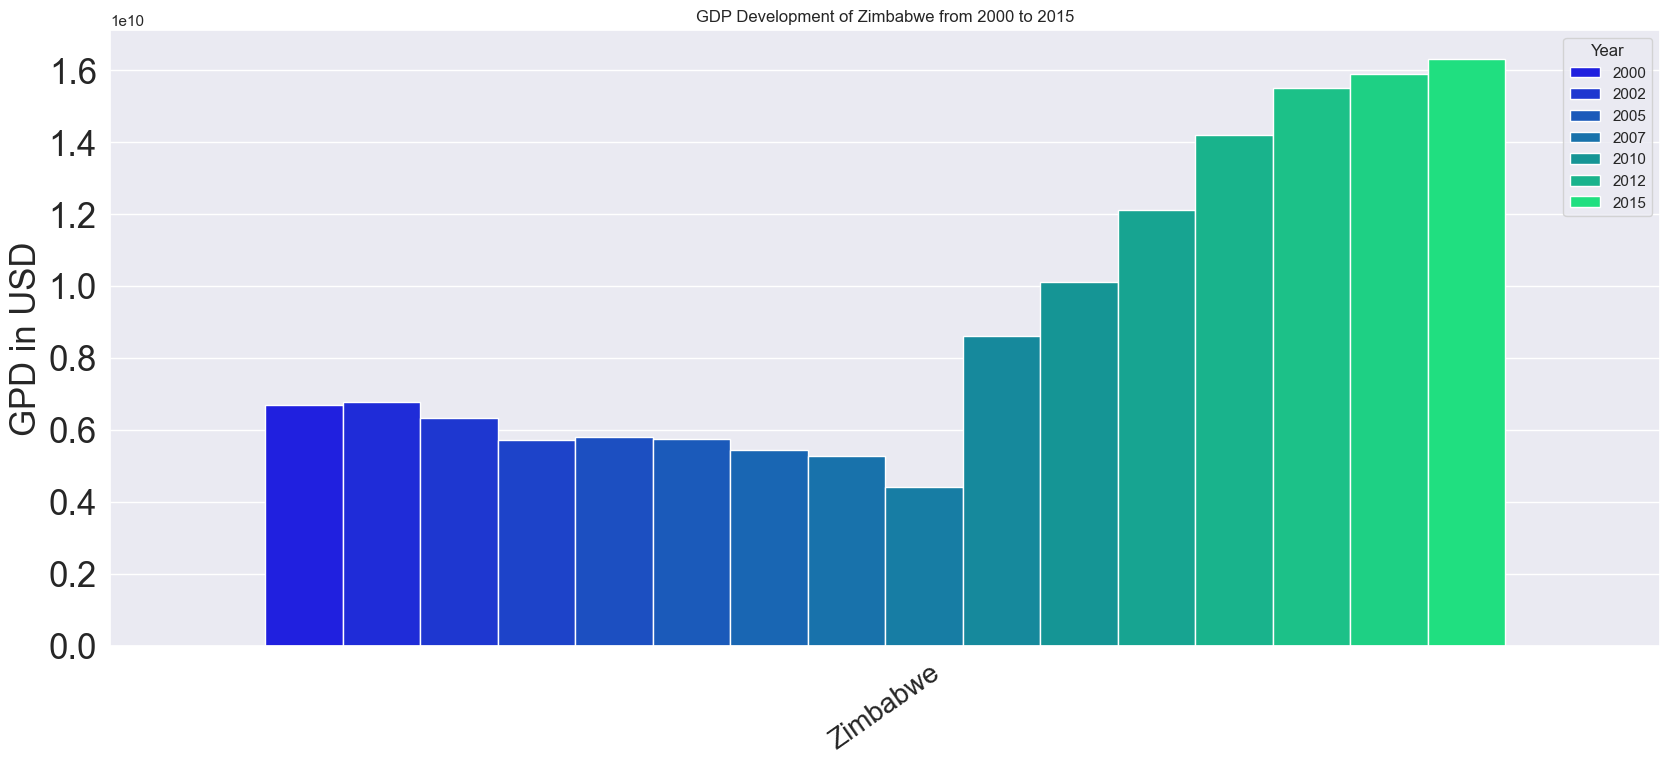

<Figure size 640x480 with 0 Axes>

In [138]:
gdp_data_zimb=gdp_data[gdp_data['Country']== 'Zimbabwe']
plt.figure(figsize=(20,8))
sn.barplot(data=gdp_data_zimb, x='Country', y='GDP', hue='Year', palette='winter')
plt.title('GDP Development of Zimbabwe from 2000 to 2015')
plt.xlabel(None)
plt.ylabel("GPD in USD", fontsize=25)
plt.xticks(rotation=35, fontsize=20)
plt.yticks(fontsize=25)
plt.show()
plt.clf()

In [139]:
#make a correlation matrix
matrix = gdp_data.drop(columns=['Country'])
corr_matrix = matrix.corr()
rounded_corr_matrix = corr_matrix.round(2)
print(rounded_corr_matrix)

          Year  Life   GDP  GDP_Inc  Life_Inc
Year      1.00  0.16  0.21     0.52      0.50
Life      0.16  1.00  0.34     0.19     -0.21
GDP       0.21  0.34  1.00     0.20     -0.10
GDP_Inc   0.52  0.19  0.20     1.00      0.24
Life_Inc  0.50 -0.21 -0.10     0.24      1.00


- The correlation matrix show the third highest correlation between Life and GDP but the index is relatively low (0.34). The GDP_Inc and Life_Inc show a correlation index of 0.24.
- The GDP shows correlation with the life expectancy and the analysis confirms this. 

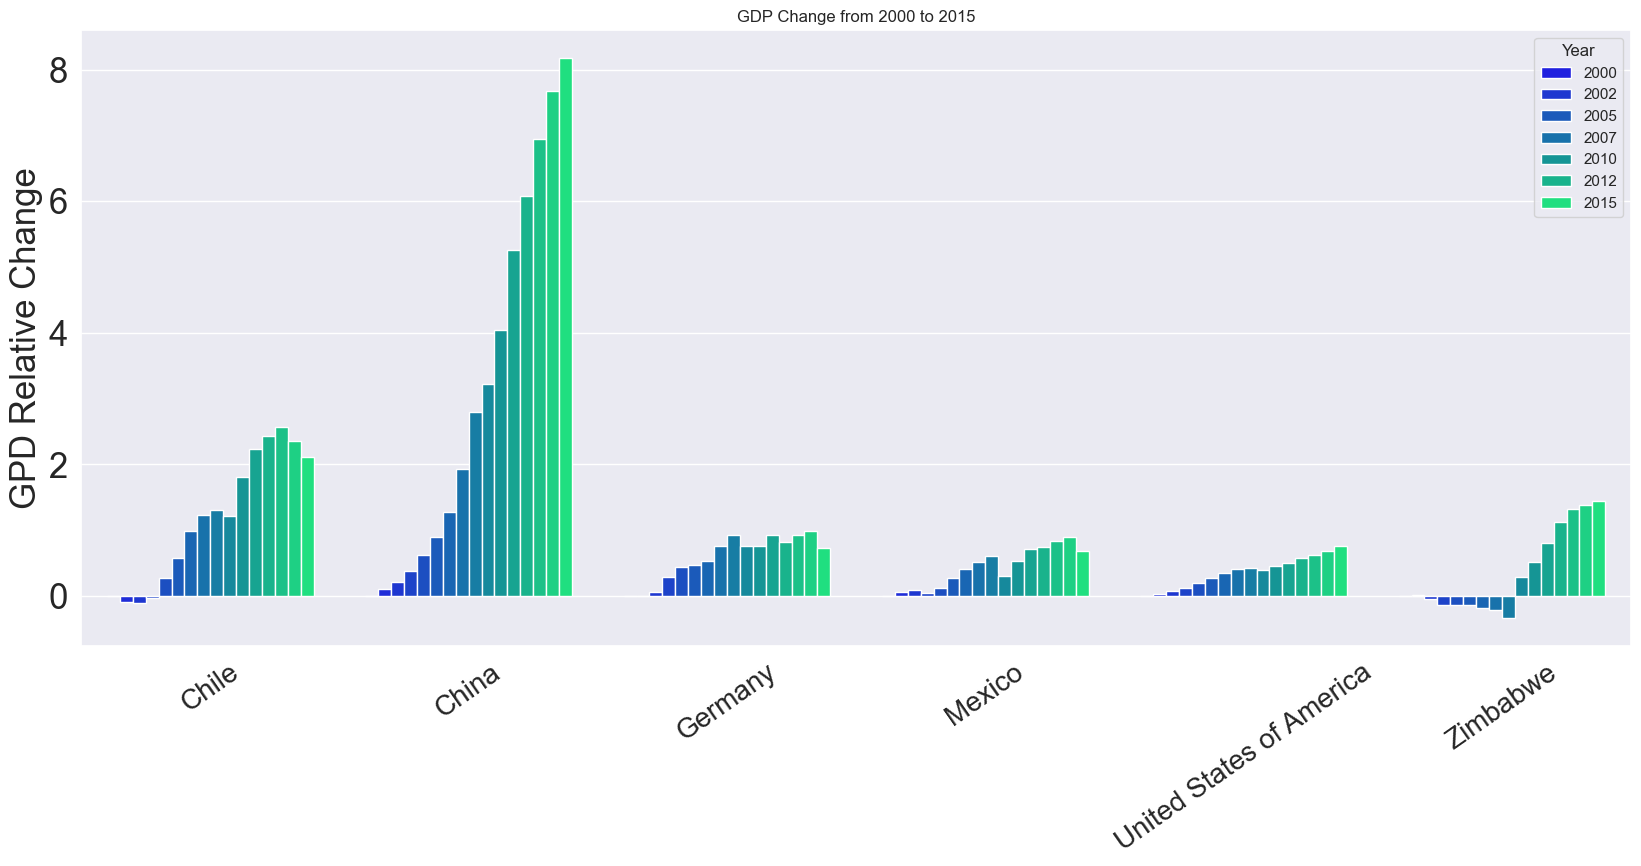

<Figure size 640x480 with 0 Axes>

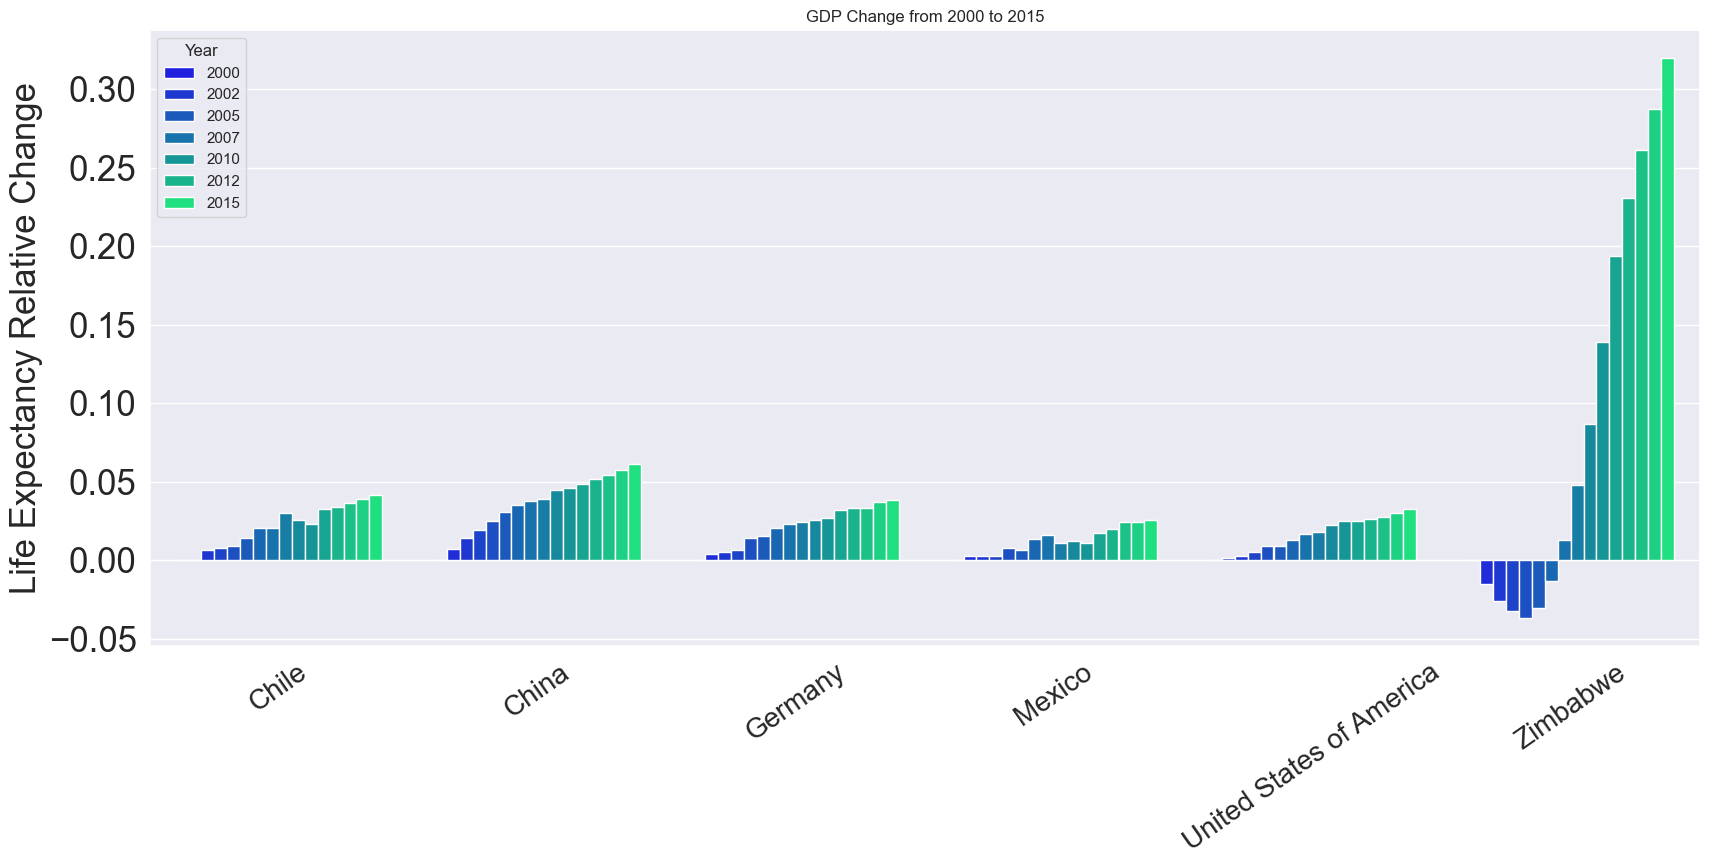

<Figure size 640x480 with 0 Axes>

In [150]:
#histogram of gdp_inc over the years
plt.figure(figsize=(20,8))
sn.barplot(data=gdp_data, x='Country', y='GDP_Inc', hue='Year', palette='winter')
plt.xlabel(None)
plt.title('GDP Change from 2000 to 2015')
plt.ylabel("GPD Relative Change", fontsize=25)
plt.xticks(rotation=35, fontsize=20)
plt.yticks(fontsize=25)
plt.show()
plt.clf()
#histogram of life_inc over the years
plt.figure(figsize=(20,8))
sn.barplot(data=gdp_data, x='Country', y='Life_Inc', hue='Year', palette='winter')
plt.xlabel(None)
plt.title('GDP Change from 2000 to 2015')
plt.ylabel("Life Expectancy Relative Change", fontsize=25)
plt.xticks(rotation=35, fontsize=20)
plt.yticks(fontsize=25)
plt.show()
plt.clf()

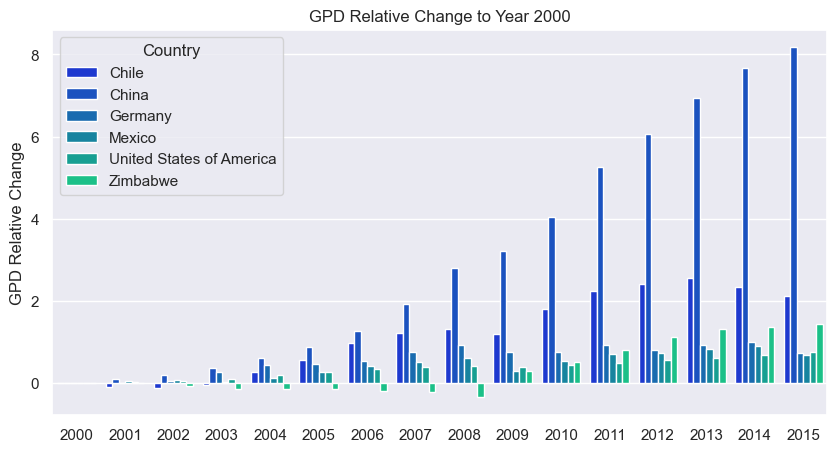

<Figure size 640x480 with 0 Axes>

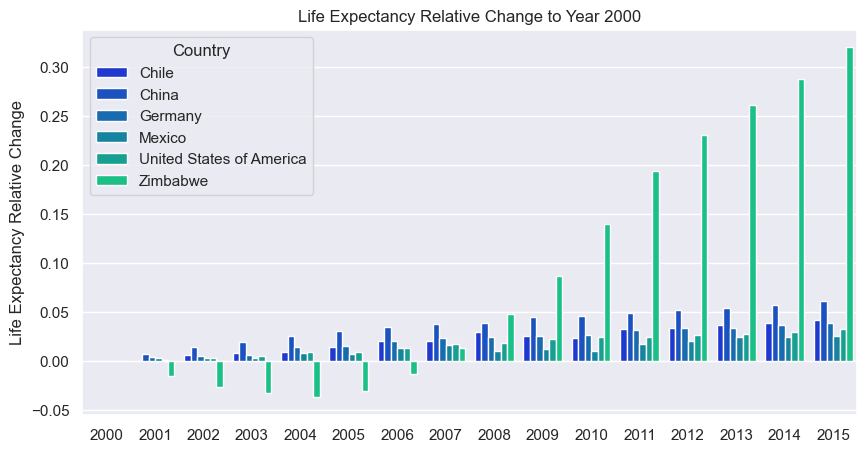

<Figure size 640x480 with 0 Axes>

In [153]:
#bar plot GDP relative change
plt.figure(figsize=(10,5))
sn.barplot(data=gdp_data, x='Year', y='GDP_Inc', hue='Country',palette='winter')
plt.title('GPD Relative Change to Year 2000')
plt.ylabel('GPD Relative Change')
plt.xlabel(None)
plt.show()
plt.clf()
#bar plot Life expectancy relative change
plt.figure(figsize=(10,5))
sn.barplot(data=gdp_data, x='Year', y='Life_Inc', hue='Country',palette='winter')
plt.title('Life Expectancy Relative Change to Year 2000')
plt.ylabel('Life Expectancy Relative Change')
plt.xlabel(None)
plt.show()
plt.clf()

- The Absolute GDP and life change shows that Zimbabwe has experienced the biggest change in life increment and the third largest change in GDP after China and Chile. When the GPD started to show positive increments, the life expectancy also showed positive increments starting in 2008.
- Chile did not show any increment of life expectancy until the GDP started growing in 2004. In 2005 the increment in life expectancy started as a consequence of the GDP growth.
- China is the country that shows the largest increment in GPD with constant growth during these years. THe life increment in response, is the second of the six countries analyzed. 

## *Conclusions & Recommendations*
=====================

- The life expectancy has increased the most for Zimbabwe over the 15 years analyzed. The life expectancy increased from 46 to 62 years. The GDP is strongly correlated to the life expectancy. When the GDP decreased, the life expectancy of the population also decreased.   
- Other countries showed a similar behavior like Chile and Mexico. While they have higher GDP in comparission with Zimbabwe, the increase is associated to higher life expectancy as well.
- The relative increase is not the same for every country. Smaller increments in life expectancy in developed countries is observed even though the GDPs are much larger. It is recommended to investigate this further.  
- The correlation matrix shows postive correlation but no strong correlation between GPD and life expectancy (index of 0.34). Is is recommended to investigate this further or work with normalized data
- It is concluded that the GDP does correlate to life expectancy, the GDP is a measure of economic results and the increase in life expectancy may be associated with factors like, easier access to health care in a stable and growing economy or higher security of the population in general.
- The analysis of the life expectancy increments are correlated with the GDP increments. This analysis makes easier to understand the GPD changes of these countries when the GDP are orders of magnitud different. It is visually more helpful to analyze relative increments that actual GDP amounts and compare them with life expectancy increments. The baseline for this analysis was the year 2000. 

## *Appendix*
=====================

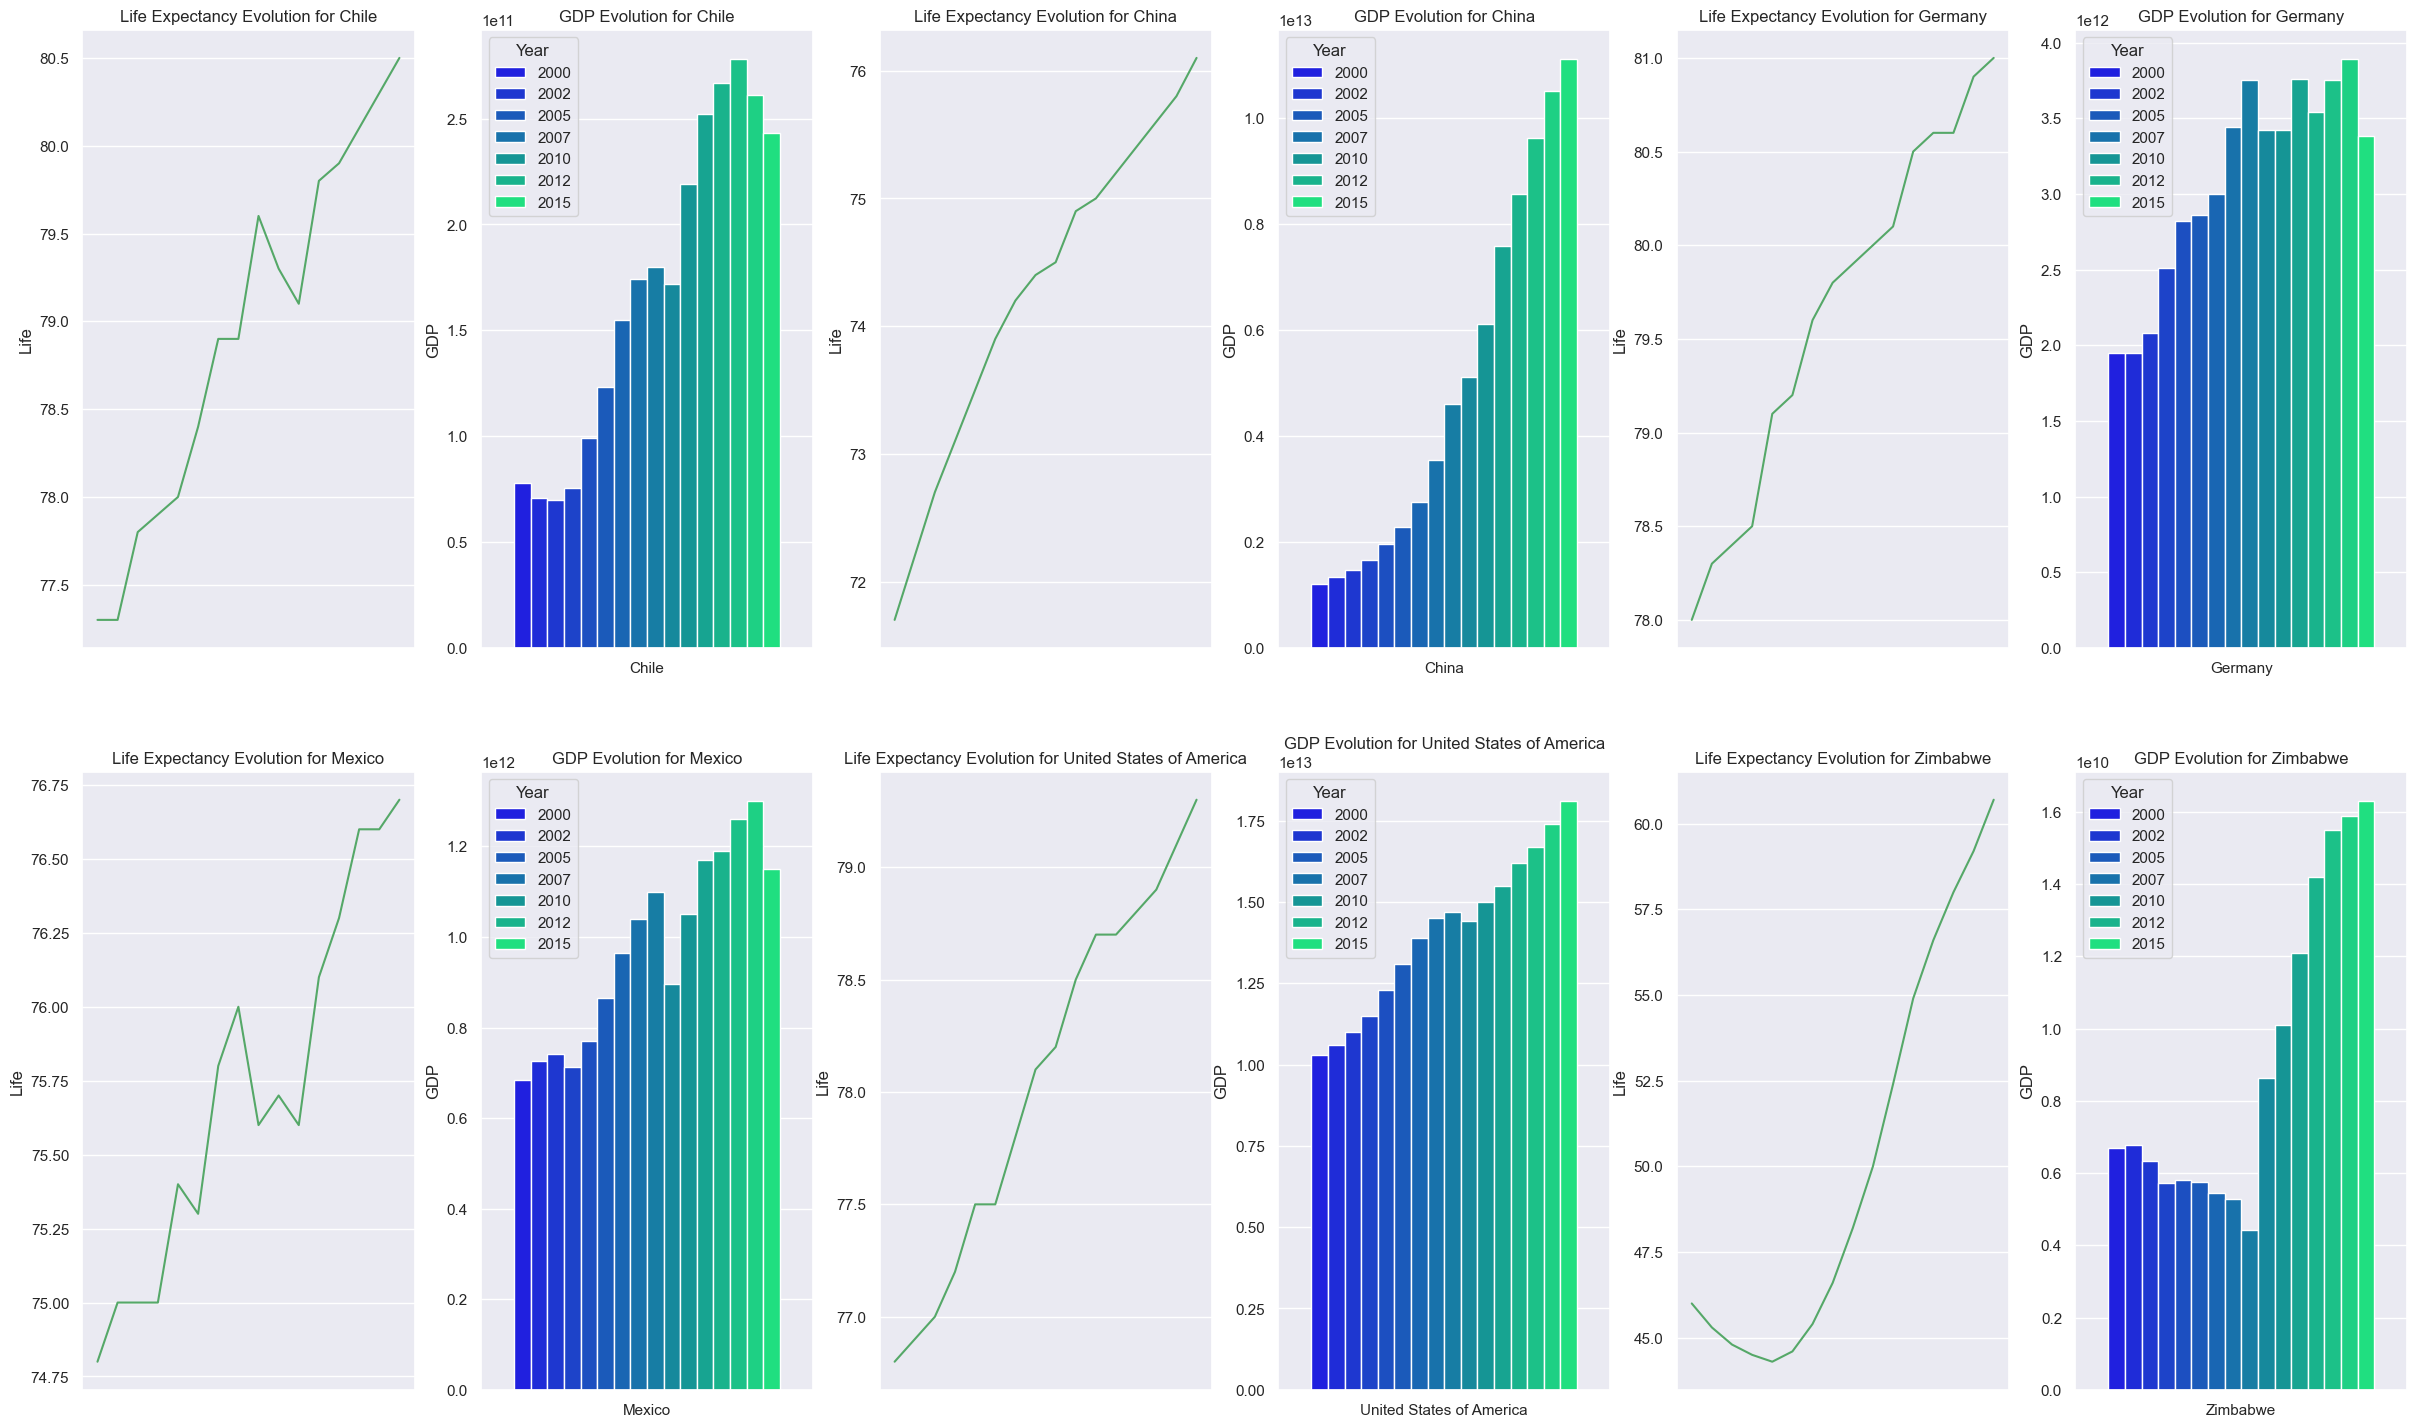

<Figure size 640x480 with 0 Axes>

In [142]:
#list of countries
countries = gdp_data['Country'].unique()
#loop to create plots of life expectancy vs GDP
plt.figure(figsize=(30,20))
counter = 1
for country in countries:
    plt.subplot(2,6,counter)
    country_data = gdp_data[gdp_data['Country'] == country]
    sn.lineplot(data=country_data, x='Year', y='Life', color='g')
    plt.xticks([])
    plt.xlabel(None)
    plt.title(f'Life Expectancy Evolution for {country}')
    counter = counter + 1
    #loop to create plots of GPD Evolution Over the Years
    plt.subplot(2,6,counter)
    country_data = gdp_data[gdp_data['Country'] == country]
    sn.barplot(data=country_data, x='Country', y='GDP', hue='Year', palette='winter')
    plt.title(f'GDP Evolution for {country}')
    plt.xticks(None)
    plt.xlabel(None)
    counter = counter + 1
#Adjust spaces between plots. 
plt.subplots_adjust(wspace = 0.2, hspace= 0.2, bottom = 0.2)
plt.show()
plt.clf()